# Проект по sql-запросам.

## Описание проекта.

Компания купила крупный сервис для чтения книг по подписке. 

**Цель исследования:**<br>
анализ базы данных сервиса для чтения книг по подписке, чтобы сформулировать ценностное предложение для нового продукта.

## Задачи.

• Посчитать, сколько книг вышло после 1 января 2000 года.<br>
• Для каждой книги посчитать количество обзоров и среднюю оценку.<br>
• Определить издательство, которое выпустило наибольшее число книг толще 50 страниц, чтобы исключить из анализа брошюры.<br>
• Вывести таблицу, которая будет содержать по году публикации:<br>
    - количество издательств,<br>
    - выпущенных книг,<br>
    - сколько всего тысяч страниц было в изданных книгах.<br>
(отобразить только те года, в которых издано более 30 книг).<br>
• Вывести в одной таблице два числа — среднюю оценку тех книг, на которые написало отзывов более 3 человек и отдельно среднюю оценку остальных книг; сделайте выводы какой рейтинг больше. <br>

## Описание данных.

База данных содержит информацию о книгах, издательствах, авторах, а также пользовательские обзоры книг.<br>
<br>
Таблица **books** - содержит данные о книгах:<br>
• `book_id` — идентификатор книги;<br>
• `author_id` — идентификатор автора;<br>
• `title` — название книги;<br>
• `num_pages` — количество страниц;<br>
• `publication_date` — дата публикации книги;<br>
• `publisher_id` — идентификатор издателя.<br>
<br>
Таблица **authors** - содержит данные об авторах:<br>
• `author_id` — идентификатор автора;<br>
• `author` — имя автора.<br>
<br>
Таблица **publishers** - содержит данные об издательствах:<br>
• `publisher_id` — идентификатор издательства;<br>
• `publisher` — название издательства;<br>
<br>
Таблица **ratings** - содержит данные о пользовательских оценках книг:<br>
• `rating_id` — идентификатор оценки;<br>
• `book_id` — идентификатор книги;<br>
• `username` — имя пользователя, оставившего оценку;<br>
• `rating` — оценка книги.<br>
<br>
Таблица **reviews** - содержит данные о пользовательских обзорах на книги:<br>
• `review_id` — идентификатор обзора;<br>
• `book_id` — идентификатор книги;<br>
• `username` — имя пользователя, написавшего обзор;<br>
• `text` — текст обзора.<br>

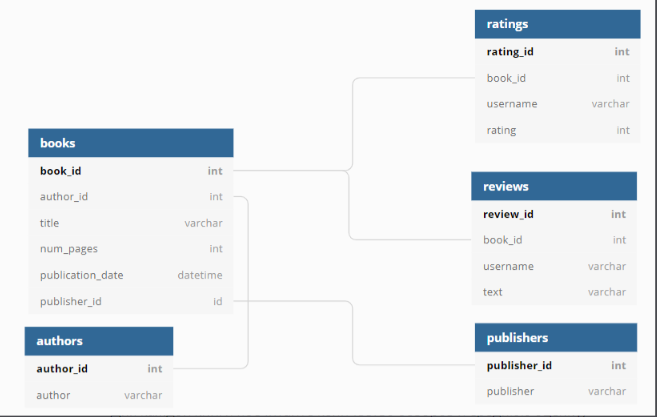

## Импорт библиотек.

In [1]:
import pandas as pd
from sqlalchemy import text, create_engine

## Доступ к базе данных.

In [ ]:
# устанавливаем параметры
db_config = {'user': 'student', # имя пользователя
'pwd': '12345', # пароль
'host': '12345.mdb.cloud.net',
'port': 1111, # порт подключения
'db': 'project-db'} # название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

## Выполнение SQL-запросов.

Создадим функцию, чтобы выполнять SQL-запрос, используя Pandas.

In [3]:
def sql_pd(query):
    return pd.io.sql.read_sql(sql=text(query), con = engine.connect())

### Изучение таблиц БД.

#### Таблица books.

In [4]:
# вывод первых 5-ти строк таблицы
sql_pd('''
       SELECT * 
       FROM books 
       LIMIT 5;
       ''')

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [5]:
# подсчет количества строк в таблице
sql_pd('''
       SELECT COUNT(*) 
       FROM books;
       ''')

,count
0,1000


#### Таблица authors.

In [6]:
# вывод первых 5-ти строк таблицы
sql_pd('''
       SELECT * 
       FROM authors 
       LIMIT 5;
       ''')

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [7]:
# подсчет количества строк в таблице
sql_pd('''
       SELECT COUNT(*) 
       FROM authors;
       ''')

,count
0,636


#### Таблица publishers.

In [8]:
# вывод первых 5-ти строк таблицы
sql_pd('''
       SELECT * 
       FROM publishers 
       LIMIT 5;
       ''')

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [9]:
# подсчет количества строк в таблице
sql_pd('''
       SELECT COUNT(*) 
       FROM publishers;
       ''')

,count
0,340


#### Таблица ratings.

In [10]:
# вывод первых 5-ти строк таблицы
sql_pd('''
       SELECT * 
       FROM ratings 
       LIMIT 5;
       ''')

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [11]:
# подсчет количества строк в таблице
sql_pd('''
       SELECT COUNT(*) 
       FROM ratings;
       ''')

,count
0,6456


#### Таблица reviews.

In [12]:
# вывод первых 5-ти строк таблицы
sql_pd('''
       SELECT * 
       FROM reviews 
       LIMIT 5;
       ''')

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [13]:
# подсчет количества строк в таблице
sql_pd('''
       SELECT COUNT(*) 
       FROM reviews;
       ''')

,count
0,2793


Были загружены и изучены таблицы из базы данных, содержащей информацию о книгах, издательствах, авторах, а также пользовательские обзоры книг.

Таблицы:<br>
• books - содержит данные о книгах и состоит из 1000 записей;<br>
• authors - содержит данные об авторах и состоит из 636 записей;<br>
• publishers - содержит данные об издательствах и состоит из 340 записей;<br>
• ratings - содержит данные о пользовательских оценках книг и состоит из 6456 записей;<br>
• reviews - содержит данные о пользовательских обзорах на книги и состоит из 2793 записей.<br>

### Расчет количества книг, которые вышли после 1 января 2000 года.

In [15]:
sql_pd('''
       SELECT COUNT(DISTINCT book_id) 
       FROM books
       WHERE publication_date > '2000-01-01';
       ''')

,count
0,819


В базе найдено 819 книг с датой публикации после 1 января 2000 года.

### Расчет количества обзоров и средней оценки для каждой книги.

In [16]:
sql_pd('''
       SELECT b.book_id,
              b.title,
              a.author,
              COUNT(DISTINCT rev.review_id) AS cnt_review,
              AVG(rt.rating) AS avg_rating
       FROM books AS b
       LEFT JOIN reviews AS rev ON b.book_id = rev.book_id
       LEFT JOIN ratings AS rt ON b.book_id = rt.book_id
       LEFT JOIN authors AS a ON b.author_id = a.author_id
       GROUP BY b.book_id, b.title, a.author
       ORDER BY cnt_review DESC
       LIMIT 5;
       ''')

,book_id,title,author,cnt_review,avg_rating
0,948,Twilight (Twilight #1),Stephenie Meyer,7,3.662500
1,497,Outlander (Outlander #1),Diana Gabaldon,6,4.125000
2,207,Eat Pray Love,Elizabeth Gilbert,6,3.395833
3,299,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,6,4.287500
4,302,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,6,4.414634


Выполнили расчет количества обзоров и средней оценки для каждой книги. Максимальное кол-во обзоров для одной книги - 7 (книга Twilight (Twilight #1)), при этом средняя оценка не самая высокая.

### Определение издательства, которое выпустило наибольшее число книг толще 50 страниц.

In [17]:
sql_pd('''
       SELECT p.publisher,
              COUNT(b.book_id) AS cnt_book
       FROM publishers AS p
       INNER JOIN books AS b ON b.publisher_id = p.publisher_id
       WHERE b.num_pages > 50
       GROUP BY p.publisher
       ORDER BY cnt_book DESC
       LIMIT 1;
       ''')

,publisher,cnt_book
0,Penguin Books,42


Издательство, которое выпустило наибольшее число книг толще 50 страниц - Penguin Books.

### Вывод таблицы, которая будет содержать по году публикации: количество издательств, выпущенных книг и сколько всего тысяч страниц было в изданных книгах (отобразить только те года, в которых издано более 30 книг).

In [20]:
sql_pd('''       
       SELECT EXTRACT(YEAR FROM b.publication_date) AS yaer_pub,
              COUNT(DISTINCT p.publisher_id) AS cnt_pub,
              COUNT(b.book_id) AS cnt_book,
              SUM(b.num_pages) AS all_pages
       FROM books AS b
       LEFT JOIN publishers AS p ON b.publisher_id = p.publisher_id
       GROUP BY EXTRACT(YEAR FROM b.publication_date)
       HAVING COUNT(DISTINCT b.book_id) > 30;
       ''')

,yaer_pub,cnt_pub,cnt_book,all_pages
0,1999.0,26,41,15763
1,2000.0,35,38,13328
2,2001.0,41,60,21758
3,2002.0,62,94,38597
4,2003.0,65,105,41423
5,2004.0,88,124,46779
6,2005.0,89,139,55967
7,2006.0,109,184,68302
8,2007.0,38,50,18258


### Вывод в одной таблице двух чисел — средняя оценка тех книг, на которые написало отзывов более 3 человек и отдельно средняя оценка остальных книг (какой рейтинг больше?).

In [23]:
sql_pd('''       
WITH
books_with_requered_ratings AS (
    SELECT b.book_id              
    FROM books AS b
    LEFT JOIN reviews AS rv ON b.book_id = rv.book_id
    GROUP BY b.book_id
    HAVING COUNT(DISTINCT rv.username) > 3
),

q AS (SELECT AVG(r.rating) AS rating_more_3
       FROM ratings AS r
       LEFT JOIN books AS b ON r.book_id = b.book_id
       WHERE b.book_id IN (SELECT book_id FROM books_with_requered_ratings)
       ),
w AS (SELECT AVG(r.rating) AS rating_less_3
       FROM ratings AS r
       LEFT JOIN books AS b ON r.book_id = b.book_id
       WHERE b.book_id NOT IN (SELECT book_id FROM books_with_requered_ratings))

SELECT *
FROM q, w;
       
''')

,rating_more_3,rating_less_3
0,3.949505,3.890375


Вывод: средние оценки - сопоставимы, при округлении до целого числа будут равны.

**Вывод по задачам:** <br>
• Количество книг в базе данных с датой публикации после 1 января 2000 года - 819.<br>
• Выполнили расчет количества обзоров и средней оценки для каждой книги. Максимальное кол-во обзоров для одной книги - 7 (книга Twilight (Twilight #1)), при этом средняя оценка не самая высокая.<br>
• Издательство, которое выпустило наибольшее количество книг (42 шт.) - Penguin Books.<br>
• Выведена требуемая таблица.<br>
• Средние оценки запрошенных в задаче данных сопоставимы.<br>